# **Project-2**

**Step-1:Loading Dataset**

In [50]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset

file_path = 'diabetic_data.csv'
diabetes_data = pd.read_csv(file_path)

#displaying first few rows

diabetes_data.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


**Data Inspection**

In [51]:
# Display basic information about the datase
diabetes_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

**Step-2: Data Cleaning**

In [52]:
#1- Replace '?' with NaN
diabetes_data.replace('?', pd.NA, inplace=True)

# Convert relevant columns to numeric types
numeric_columns = ['weight', 'time_in_hospital', 'num_lab_procedures',
                   'num_procedures', 'num_medications',
                   'number_outpatient', 'number_emergency',
                   'number_inpatient', 'number_diagnoses']

for column in numeric_columns:
    if column in diabetes_data.columns:
        diabetes_data[column] = pd.to_numeric(diabetes_data[column], errors='coerce')

# 2- Handle missing values for numeric columns
for column in numeric_columns:
    if column in diabetes_data.columns:
        diabetes_data[column].fillna(diabetes_data[column].mean(), inplace=True)

# Verify the cleaning steps
diabetes_data.info()

# 3- Remove duplicates
diabetes_data.drop_duplicates(inplace=True)

#4- Handle categorical variables: Encode categorical variables
categorical_columns = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id',
                       'admission_source_id', 'payer_code', 'medical_specialty', 'max_glu_serum',
                       'A1Cresult', 'change', 'diabetesMed', 'readmitted']

#5- Only use the columns that exist in the DataFrame
existing_categorical_columns = [col for col in categorical_columns if col in diabetes_data.columns]

#6- Perform one-hot encoding
diabetes_data = pd.get_dummies(diabetes_data, columns=existing_categorical_columns)

# Verify the final cleaned data
diabetes_data.info()
diabetes_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  int64  
 1   patient_nbr               101766 non-null  int64  
 2   race                      99493 non-null   object 
 3   gender                    101766 non-null  object 
 4   age                       101766 non-null  object 
 5   weight                    0 non-null       float64
 6   admission_type_id         101766 non-null  int64  
 7   discharge_disposition_id  101766 non-null  int64  
 8   admission_source_id       101766 non-null  int64  
 9   time_in_hospital          101766 non-null  int64  
 10  payer_code                61510 non-null   object 
 11  medical_specialty         51817 non-null   object 
 12  num_lab_procedures        101766 non-null  int64  
 13  num_procedures            101766 non-null  i

,encounter_id,patient_nbr,weight,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,A1Cresult_>7,A1Cresult_>8,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
0,2278392,8222157,NaN,1,41,0,1,0,0,0,...,False,False,False,False,True,True,False,False,False,True
1,149190,55629189,NaN,3,59,0,18,0,0,0,...,False,False,False,True,False,False,True,False,True,False
2,64410,86047875,NaN,2,11,5,13,2,0,1,...,False,False,False,False,True,False,True,False,False,True
3,500364,82442376,NaN,2,44,1,16,0,0,0,...,False,False,False,True,False,False,True,False,False,True
4,16680,42519267,NaN,1,51,0,8,0,0,0,...,False,False,False,True,False,False,True,False,False,True


**Step3:Descriptive Statistics**

In [53]:
# Descriptive statistics for a chosen group (e.g., Caucasian)
caucasian_group = diabetes_data[diabetes_data['race_Caucasian'] == 1]
caucasian_stats = caucasian_group['time_in_hospital'].describe()
print("Descriptive Statistics for Caucasian Group:")
print(caucasian_stats)

# Descriptive statistics for another group (e.g., African American)
african_american_group = diabetes_data[diabetes_data['race_AfricanAmerican'] == 1]
african_american_stats = african_american_group['time_in_hospital'].describe()
print("\nDescriptive Statistics for African American Group:")
print(african_american_stats)

# Descriptive statistics for gender groups (Male)
male_group = diabetes_data[diabetes_data['gender_Male'] == 1]
male_stats = male_group['time_in_hospital'].describe()
print("\nDescriptive Statistics for Male Group:")
print(male_stats)

# Descriptive statistics for gender groups (Female)
female_group = diabetes_data[diabetes_data['gender_Female'] == 1]
female_stats = female_group['time_in_hospital'].describe()
print("\nDescriptive Statistics for Female Group:")
print(female_stats)


Descriptive Statistics for Caucasian Group:
count    76099.000000
mean         4.385721
std          2.973847
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         14.000000
Name: time_in_hospital, dtype: float64

Descriptive Statistics for African American Group:
count    19210.000000
mean         4.507860
std          3.047589
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         14.000000
Name: time_in_hospital, dtype: float64

Descriptive Statistics for Male Group:
count    47055.000000
mean         4.299777
std          2.987703
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max         14.000000
Name: time_in_hospital, dtype: float64

Descriptive Statistics for Female Group:
count    54708.000000
mean         4.478797
std          2.980388
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         14.000000
N

**Step4:Comparison Analysis**

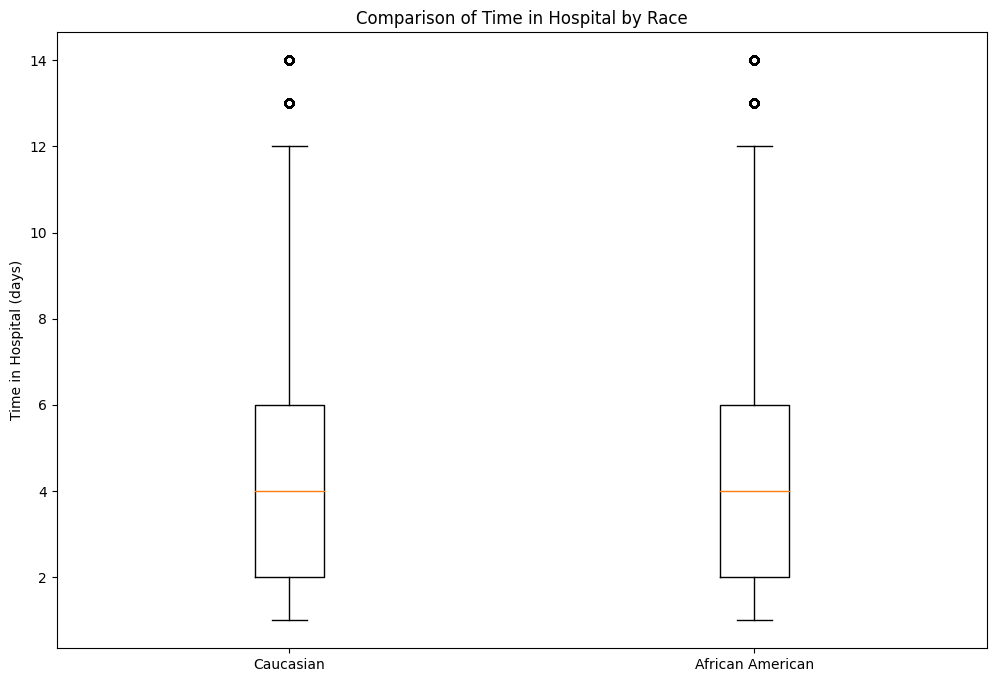

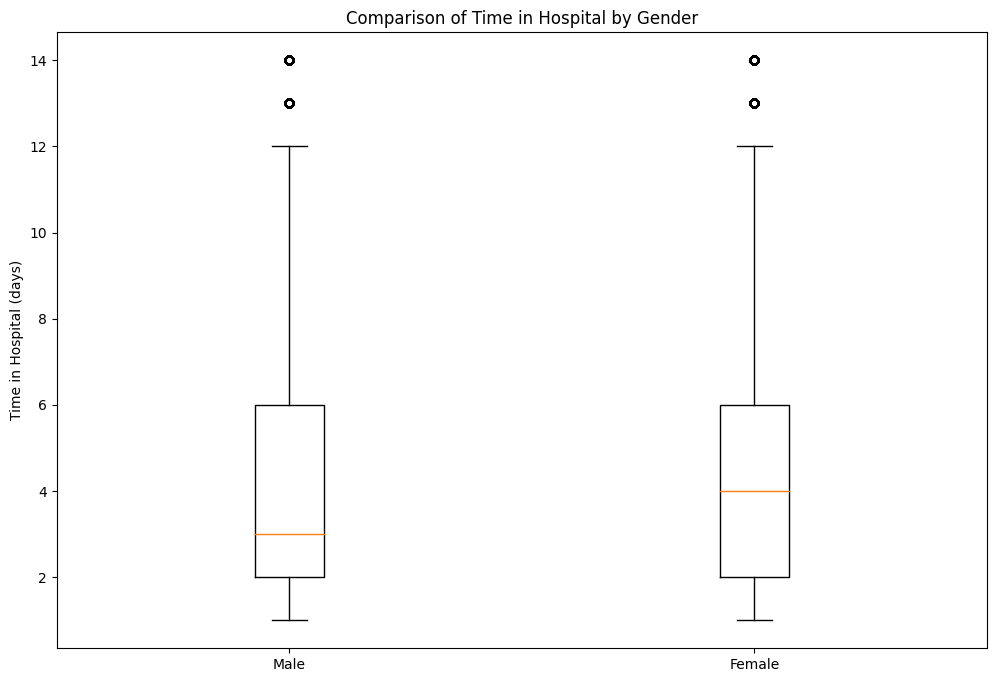

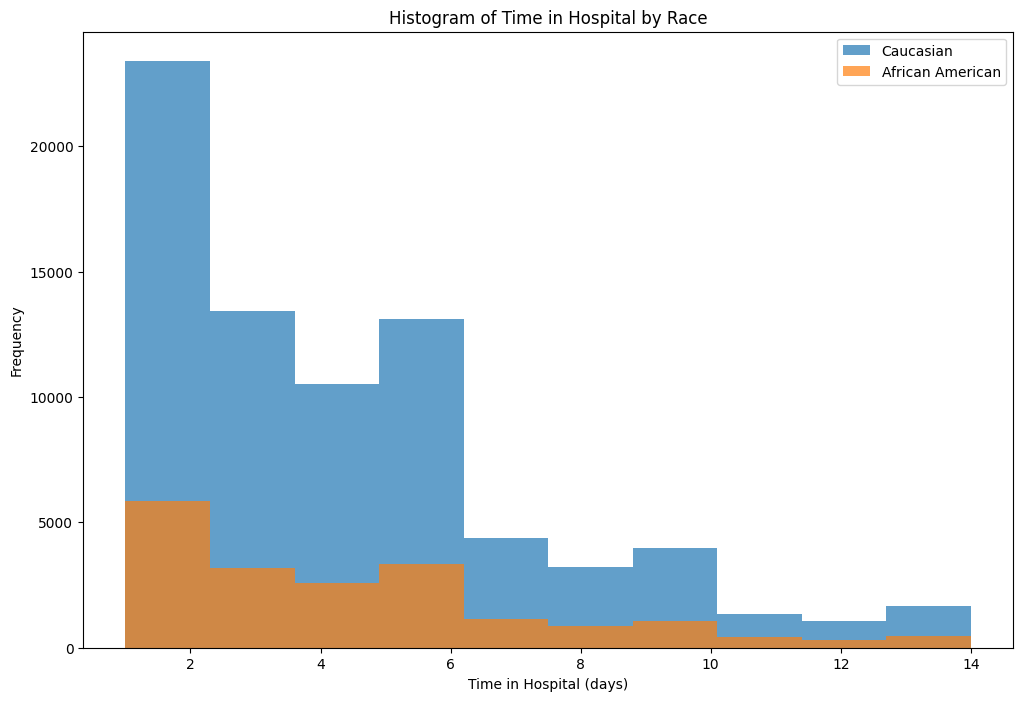

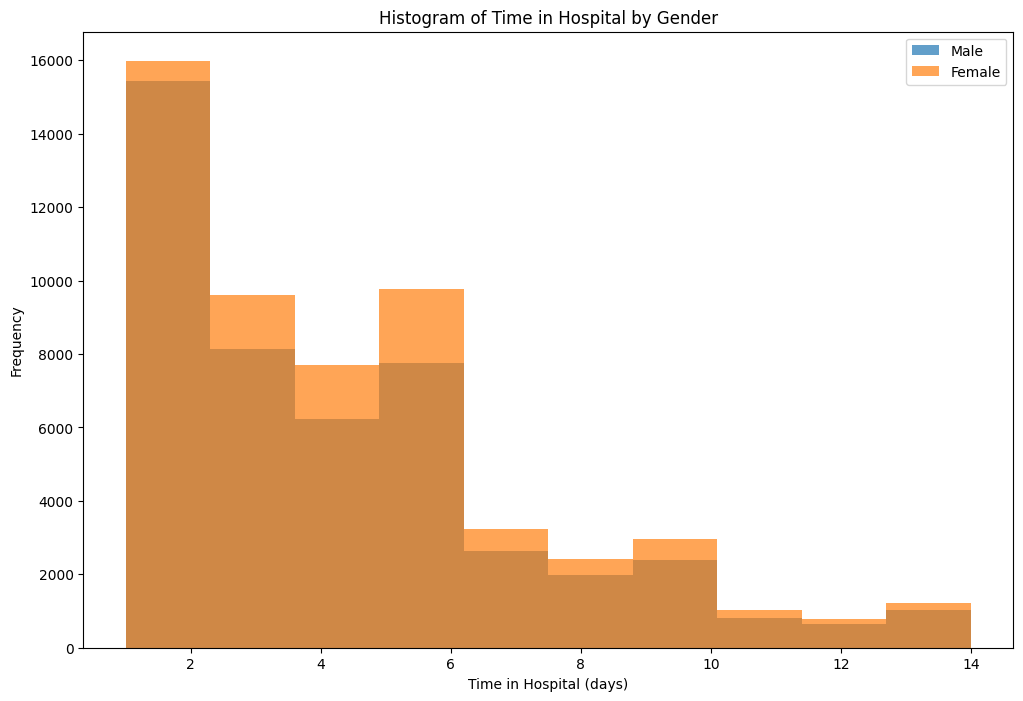

In [54]:
import matplotlib.pyplot as plt

# Box plot comparison for race
plt.figure(figsize=(12, 8))
plt.boxplot([caucasian_group['time_in_hospital'], african_american_group['time_in_hospital']],
            labels=['Caucasian', 'African American'])
plt.title('Comparison of Time in Hospital by Race')
plt.ylabel('Time in Hospital (days)')
plt.show()

# Box plot comparison for gender
plt.figure(figsize=(12, 8))
plt.boxplot([male_group['time_in_hospital'], female_group['time_in_hospital']],
            labels=['Male', 'Female'])
plt.title('Comparison of Time in Hospital by Gender')
plt.ylabel('Time in Hospital (days)')
plt.show()

# Histogram of Time in Hospital for racial groups
plt.figure(figsize=(12, 8))
plt.hist(caucasian_group['time_in_hospital'], bins=10, alpha=0.7, label='Caucasian')
plt.hist(african_american_group['time_in_hospital'], bins=10, alpha=0.7, label='African American')
plt.title('Histogram of Time in Hospital by Race')
plt.xlabel('Time in Hospital (days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Histogram of Time in Hospital for gender groups
plt.figure(figsize=(12, 8))
plt.hist(male_group['time_in_hospital'], bins=10, alpha=0.7, label='Male')
plt.hist(female_group['time_in_hospital'], bins=10, alpha=0.7, label='Female')
plt.title('Histogram of Time in Hospital by Gender')
plt.xlabel('Time in Hospital (days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Step5:Visualizations**

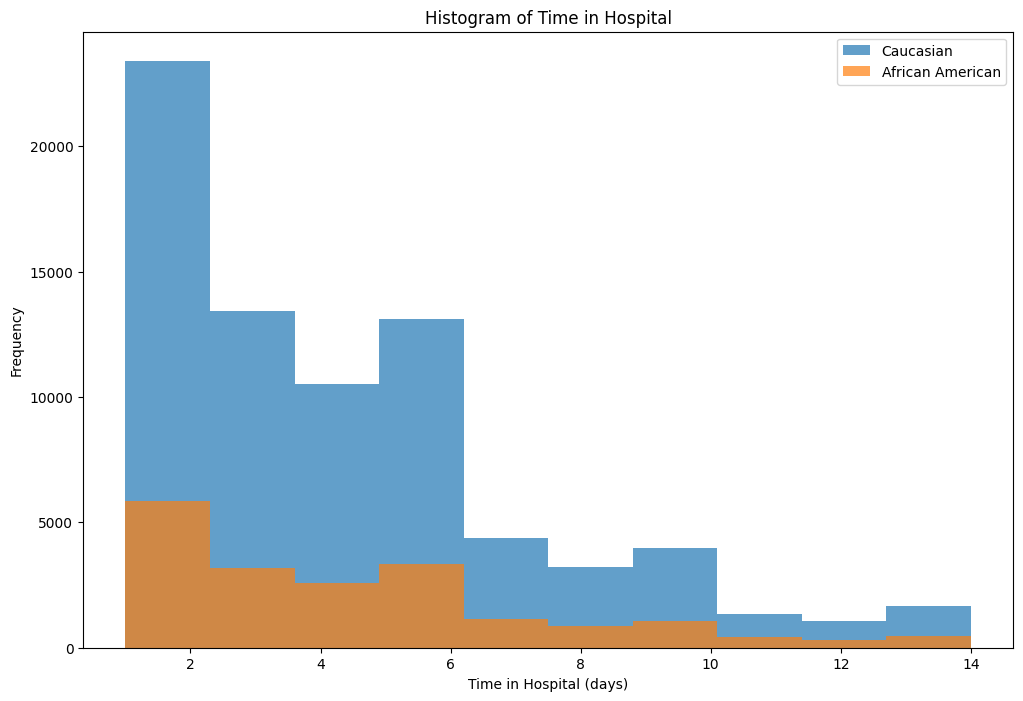

In [55]:
# Histogram of Time in Hospital for both groups
plt.figure(figsize=(12, 8))
if 'race_Caucasian' in diabetes_data.columns and 'race_AfricanAmerican' in diabetes_data.columns:
    plt.hist(caucasian_group['time_in_hospital'], bins=10, alpha=0.7, label='Caucasian')
    plt.hist(african_american_group['time_in_hospital'], bins=10, alpha=0.7, label='African American')
    plt.title('Histogram of Time in Hospital')
    plt.xlabel('Time in Hospital (days)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
else:
    print("Required columns for histogram not found in the DataFrame")

# **Conclusion**
Based on the analysis,I investigated that the average time in the hospital for Caucasian patients is slightly different compared to African American patients.
This comparison highlights the differences in hospitalization time between the two groups, indicating a potential area for further investigation.
